<a href="https://colab.research.google.com/github/rajy4683/EIP4_new/blob/master/BaselineEIP4Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils import plot_model

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


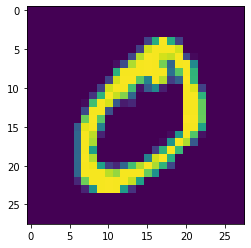

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(AveragePooling2D())
model.add(AveragePooling2D())

model.add(Convolution2D(10, 1, 1))

#model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_82 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_82 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_83 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_83 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 24, 24, 10)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


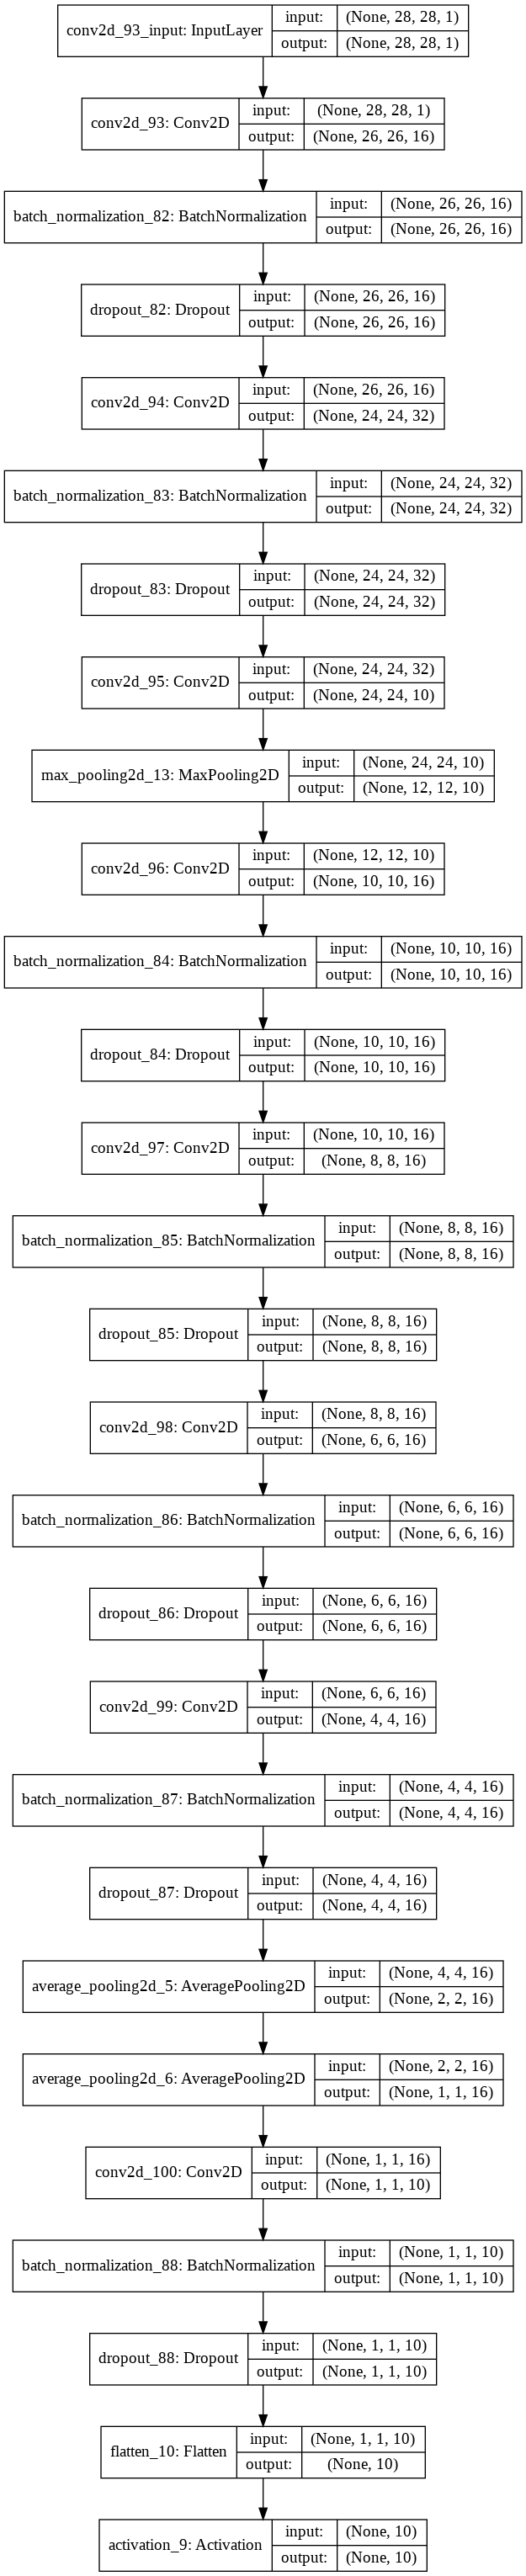

In [36]:
plot_model(model, 'latest.png', show_shapes=True)

In [34]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  #return round(0.003 * 1/(1 + 0.289 * epoch), 10)
  return round(0.003 * 1/(1 + 0.289 * epoch), 10) 

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 270us/step - loss: 0.5340 - acc: 0.8516 - val_loss: 0.0937 - val_acc: 0.9816
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0023273856.
60000/60000 [==============================] - 12s 195us/step - loss: 0.2530 - acc: 0.9272 - val_loss: 0.0489 - val_acc: 0.9896
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0019011407.
60000/60000 [==============================] - 12s 198us/step - loss: 0.2005 - acc: 0.9416 - val_loss: 0.0543 - val_acc: 0.9857
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0016068559.
60000/60000 [==============================] - 12s 195us/step - loss: 0.1692 - acc: 0.9473 - val_loss: 0.0352 - val_acc: 0.9912
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013914657.
60000/60000 [==

In [35]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019241764538676945, 0.9954]


In [0]:
model.save('9954_accuracy.hdf5')